In [ ]:
#C1
# Importar librerias

import numpy as np
import matplotlib.pyplot as plt
import time

import keras


# Librerias para la red convolucional
from keras.models import *
from keras.layers import *
from keras.optimizers import *

# Librerias para cargar imagenes

from PIL import Image
import numpy as np
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from PIL import Image
import glob
import numpy as np
import os
#cargar ka base de datos, directorio dependiente de cada persona
dir_img='/content/drive/MyDrive/baches_images'
dir_lab='/content/drive/MyDrive/baches_label'

image_list=[]
label_list=[]
background_color= np.array([255,0,255])#solo el magenta
for filename in glob.glob('/content/drive/MyDrive/baches_images/*.png'):
    im = Image.open(filename)
    image_list.append(np.asarray(im))

    # Construir la ruta de la etiqueta
    filename1 = os.path.basename(filename).replace('images', 'labels')
    filename2 = filename1.replace('bache_', 'label_bache_')
    label_path = os.path.join(dir_lab, filename2)

    # Cargar la etiqueta solo si el archivo existe
    if os.path.exists(label_path):
        la = Image.open(label_path)
        gt_image = np.asarray(la)
        gt_bg = np.all(gt_image == background_color, axis=2)
        label_list.append(np.expand_dims(gt_bg, axis=2))
    else:
        print(f"El archivo de etiqueta no existe: {label_path}")

# Imprimir el conteo de imágenes y etiquetas
print('Total de imagenes:', len(image_list))
print('Total de label:', len(label_list))

Total de imagenes: 178
Total de label: 178


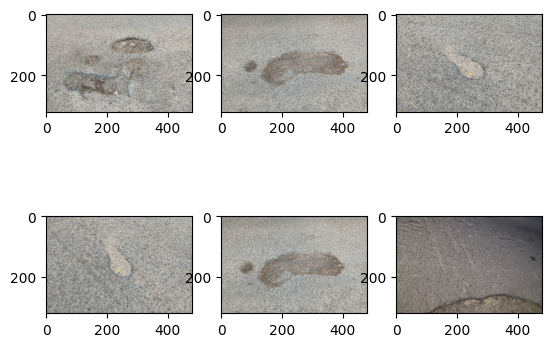

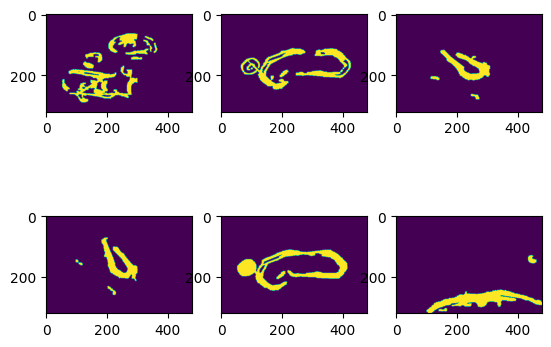

142
36
142
36


In [ ]:
# C3
# Visualizar y acomodar los datos

# Visualizar los datos
fig = plt.figure()
for i in range (0,6):
  a = fig.add_subplot(2,3,i+1)
  plt.imshow(image_list[i])
plt.show()

fig1 = plt.figure()
for j in range (0,6):
  b = fig1.add_subplot(2,3,j+1)
  plt.imshow(label_list[j][:,:,0])
plt.show()


# Separar los datos en conjunto de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.20, random_state=42)  # Se requiere el 75% para entrenamiento


print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
# C4
# Creación de la red U-Net
from keras.regularizers import l1, l2
# Modelo: U-Net
input_size = (320,480,3)

def unet(input_size = (320,480,3)):
    inputs = Input(input_size)
    s = Lambda(lambda x: x / 255) (inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(s)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

     # Capas de convolución con regularización L1 y L2
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l1(0.01))(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv6)

    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l1(0.01))(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv7)

    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l1(0.01))(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv8)

    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l1(0.01))(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))(conv9)

    # Capa de salida
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    return Model(inputs=inputs, outputs=conv10)

model = unet(input_size)

model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 320, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 320, 480, 64  1792        ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# C5
# Entrenar el modelo

log=model.fit(x=np.array(X_train)
          ,y=np.array(y_train)
          ,epochs=30      # Definir el numero de epocas para el entrenamiento
          ,batch_size=2
          ,validation_data=(np.array(X_test),np.array(y_test)))


Epoch 1/30
71/71 [==============================] - 52s 433ms/step - loss: 24.6847 - accuracy: 0.9099 - val_loss: 22.3343 - val_accuracy: 0.9141
Epoch 2/30
71/71 [==============================] - 32s 446ms/step - loss: 20.2173 - accuracy: 0.9100 - val_loss: 18.1275 - val_accuracy: 0.9141
Epoch 3/30
71/71 [==============================] - 31s 441ms/step - loss: 16.2780 - accuracy: 0.9100 - val_loss: 14.4677 - val_accuracy: 0.9141
Epoch 4/30
71/71 [==============================] - 31s 430ms/step - loss: 12.8864 - accuracy: 0.9100 - val_loss: 11.3491 - val_accuracy: 0.9141
Epoch 5/30
71/71 [==============================] - 31s 442ms/step - loss: 10.0087 - accuracy: 0.9100 - val_loss: 8.7210 - val_accuracy: 0.9141
Epoch 6/30
71/71 [==============================] - 31s 432ms/step - loss: 7.6230 - accuracy: 0.9100 - val_loss: 6.5831 - val_accuracy: 0.9141
Epoch 7/30
71/71 [==============================] - 31s 431ms/step - loss: 5.7063 - accuracy: 0.9100 - val_loss: 4.8800 - val_accurac

1/1 [==============================] - 0s 20ms/step
Tiempo de ejecucion:  0.13795161247253418


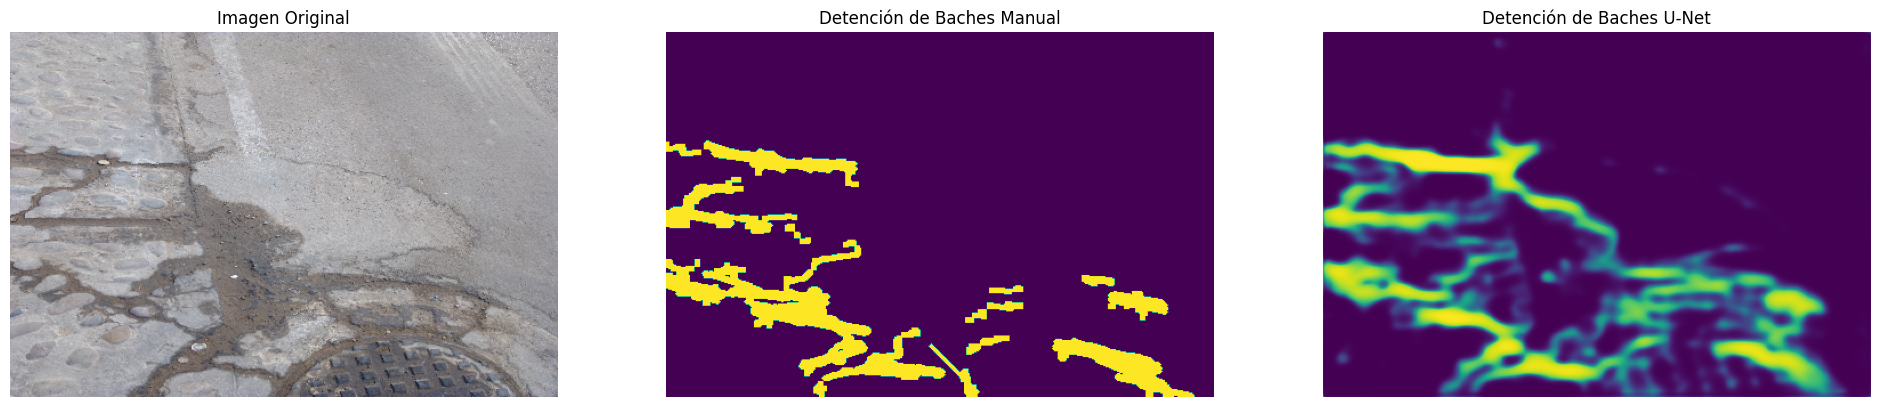

In [ ]:
# C6
# Probar el modelo con una sola imagen

t_l = y_test [8]
t1 = t_l[:,:,0]


inicio = time.time()
pred = model.predict(np.expand_dims(X_test[8],axis=0))
fin = time.time()
print ('Tiempo de ejecucion: ', fin-inicio)

plt.figure(figsize=(24, 6))

plt.subplot(131)
plt.imshow(X_test[8])
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(t1)
plt.title('Detención de Baches Manual')
plt.axis('off')

plt.subplot(133)
plt.imshow(pred[0,:,:,0])
plt.title('Detención de Baches U-Net')
plt.axis('off')

plt.show()




1/1 [==============================] - 0s 20ms/step
Tiempo de ejecucion:  0.19571137428283691


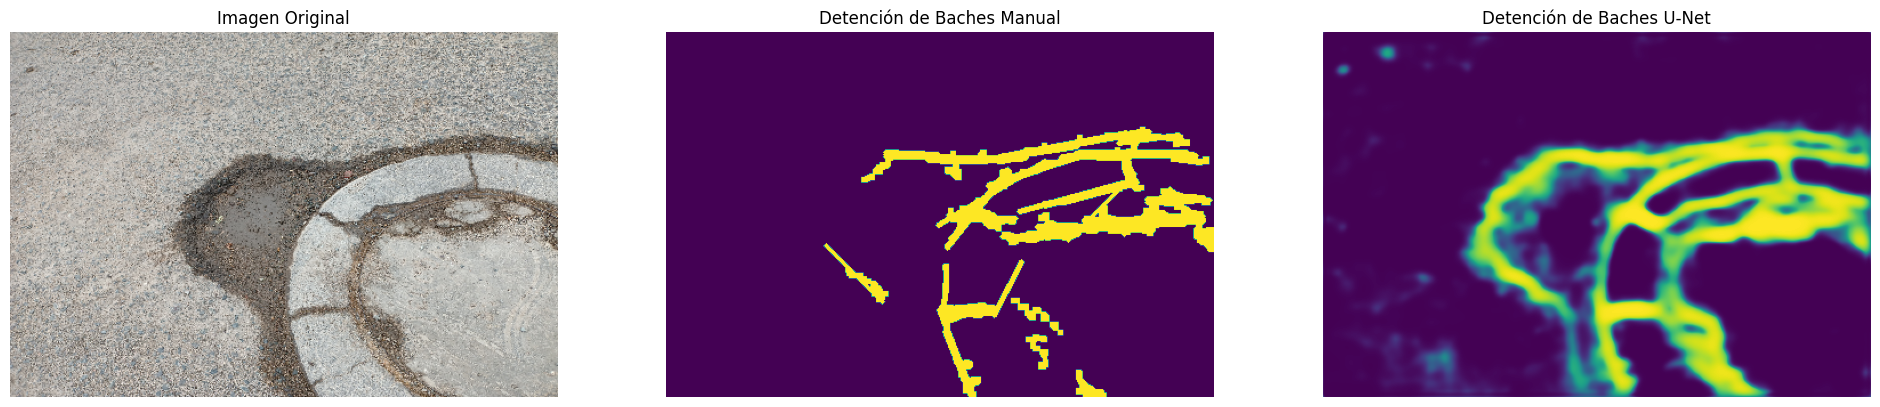

In [ ]:
# C6
# Probar el modelo con una sola imagen

t_l = y_test [22]
t1 = t_l[:,:,0]


inicio = time.time()
pred = model.predict(np.expand_dims(X_test[22],axis=0))
fin = time.time()
print ('Tiempo de ejecucion: ', fin-inicio)

plt.figure(figsize=(24, 6))

plt.subplot(131)
plt.imshow(X_test[22])
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(t1)
plt.title('Detención de Baches Manual')
plt.axis('off')

plt.subplot(133)
plt.imshow(pred[0,:,:,0])
plt.title('Detención de Baches U-Net')
plt.axis('off')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

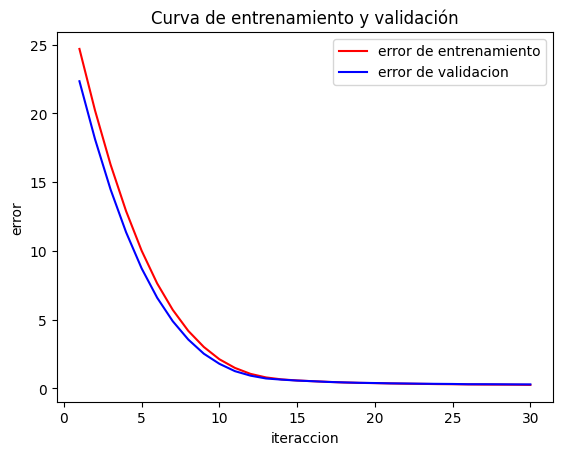

In [ ]:
error=log.history['loss']
val_error=log.history['val_loss']
epochs=range(1,len(error)+1)
plt.plot(epochs,error,color='red',label='error de entrenamiento')
plt.plot(epochs,val_error,color='blue',label='error de validacion')
plt.title('Curva de entrenamiento y validación')
plt.xlabel('iteraccion')
plt.ylabel('error')
plt.legend()
plt.show

2/2 [==============================] - 42s 6s/step
True Positives: 214360 ( 45.1107566300354 %)
False Positives: 145306 ( 2.874833759165751 %)
True Negatives: 4909108 ( 97.12516624083425 %)
False Negatives: 260826 ( 54.8892433699646 %)
Precision: 0.5959973975855377
Recall: 0.451107566300354


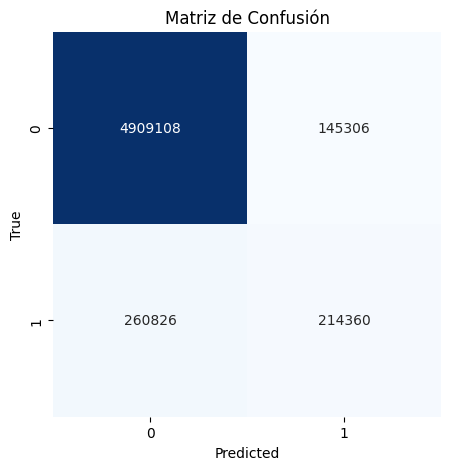

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(np.array(X_test))

# Redondear las predicciones a 0 o 1 (ya que es un problema de clasificación binaria)
y_pred_binary = np.round(y_pred).ravel()

# Convertir las etiquetas del conjunto de prueba a formato binario
y_test_binary = np.round(y_test).ravel()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Calcular los valores de interés
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calcular precision y recall
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

# Calcular porcentajes
total_samples = len(y_test_binary)
total_positives = true_positive + false_negative
total_negatives = true_negative + false_positive

percent_true_positive = (true_positive / total_positives) * 100
percent_false_positive = (false_positive / total_negatives) * 100
percent_true_negative = (true_negative / total_negatives) * 100
percent_false_negative = (false_negative / total_positives) * 100

# Mostrar los valores en la consola
print("True Positives:", true_positive, "(", percent_true_positive, "%)")
print("False Positives:", false_positive, "(", percent_false_positive, "%)")
print("True Negatives:", true_negative, "(", percent_true_negative, "%)")
print("False Negatives:", false_negative, "(", percent_false_negative, "%)")

print("Precision:", precision)
print("Recall:", recall)

# Mostrar la matriz de confusión como un gráfico de calor
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()
